The aim of this program is to simulate a postion controller in the z-axis

In [1]:
%pylab inline
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
import math

Populating the interactive namespace from numpy and matplotlib


# Eulers Integration

In [2]:
def simulate(Δt,z,u):
    z = z + Δt*u
    return z

# Control Policy

In [3]:
def control(t, z, pos_ref, kp_kd, mass, g, dz):
    error = pos_ref - z
    u = kp_kd[0]*error[0] + kp_kd[1]*error[1] + mass*g
    dz[0] = z[1]
    dz[1] = u/mass-g 
    return dz 

# Running the Simulator

In [4]:
tf=10
Δt = 0.1  #Time Step
time = np.linspace(0.,tf,int(tf/Δt+1))
print(time)

#Initial Conditions
z = np.array([0.,0.])
z_log = [np.copy(z)]
dz = np.array([0.,0.])
pos_ref = np.array([5.,0.])
kp_kd = np.array([4.,5.])
mass = 1
g = 9.8

for t in time[1:]:
    contrl = control(t,z,pos_ref,kp_kd,mass,g,dz)
    #print(contrl)
    z = simulate(Δt,z,contrl)
    #print(sim)
    z_log.append(np.copy(z))
z_log = np.array(z_log)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


# Plotting 

(101, 2)
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


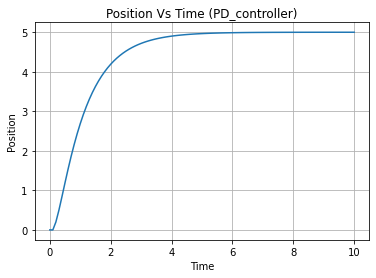

In [5]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
print(z_log.shape)
plt.grid()
ax1.plot(time,z_log[:,0])
ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.set_title('Position Vs Time (PD_controller)')
z_log[:,1]=time
print(z_log[:,1])
plt.show()

# Animation

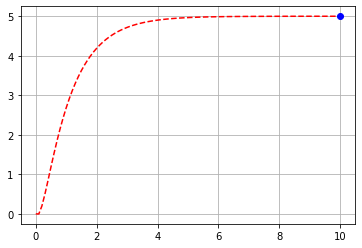

In [7]:
fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    #Path
    
    plt.plot(z_log[:,1],z_log[:,0], 'r--')
 
    #Initial Conditions
    plt.plot(z_log[t,1], z_log[t,0], 'bo')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Position')
    ax1.set_title('Position Vs Time (PD_controller)')
    plt.grid()

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)
#anim.save('free_fall.gif', writer='imagemagick')
HTML(anim.to_jshtml())